In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print("Librerias importadas")

Librerias importadas


In [ ]:
import os
os.listdir('./images/')

In [ ]:
#import bands as separate 1 band raster
band4 = rasterio.open('./images/B04.jp2', driver='JP2OpenJPEG')#red
band8 = rasterio.open('./images/B08.jp2', driver='JP2OpenJPEG') #nir

In [ ]:
#number of raster rows
band4.height

In [ ]:
#number of raster columns
band4.width

In [ ]:
#plot band 
plot.show(band4)

In [ ]:
#type of raster byte
band4.dtypes[0]

In [ ]:
#raster sytem of reference
band4.crs

In [ ]:
#raster transform parameters
band4.transform

In [ ]:
#raster values as matrix array
band4.read(1)

In [ ]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band8, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [ ]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band8.read(1).astype('float64')

In [ ]:
nir

In [ ]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir + red) == 0., 
    0, 
    (nir - red) / (nir + red))
ndvi[:5,:5]

In [ ]:
#export ndvi image
ndviImage = rasterio.open('./images/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

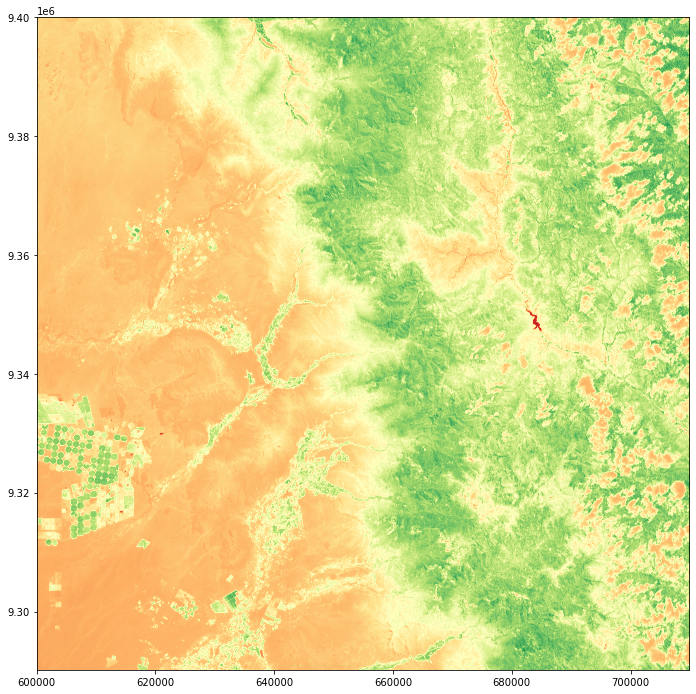

<AxesSubplot:>

In [21]:
#plot ndvi
ndvi = rasterio.open('./images/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)

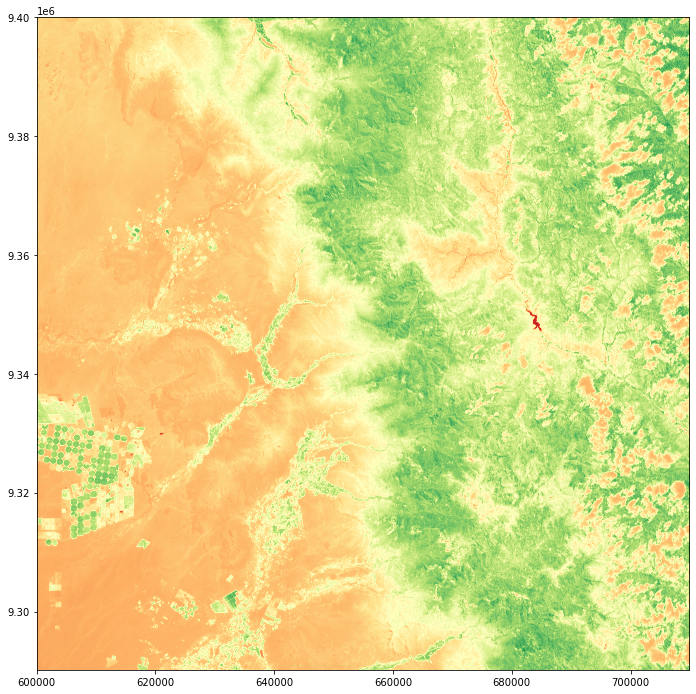

<AxesSubplot:>

In [20]:
#plot ndvi 2
ndvi = rasterio.open('./images/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plt.set_cmap("RdYlGn")
plot.show(ndvi)

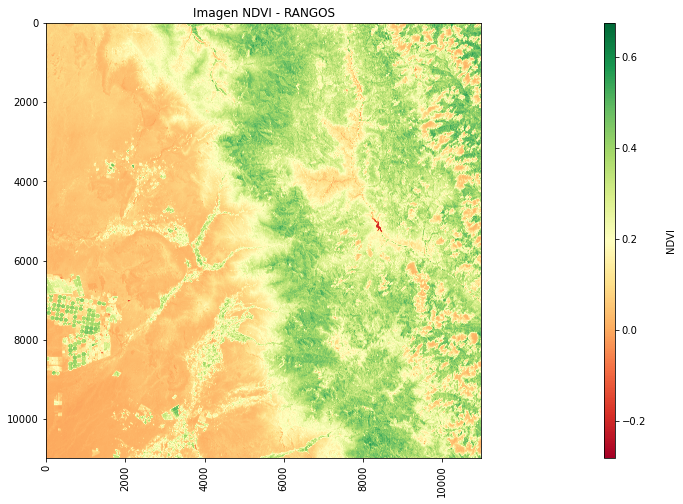

In [43]:
def plot_aop_refl(band_array,ax=plt.gca(),title='',cbar ='on',cmap_title='',colormap='Greys'):
    plot = plt.imshow(band_array); 
    if cbar == 'on':
        cbar = plt.colorbar(plot,aspect=40); plt.set_cmap(colormap); 
        cbar.set_label(cmap_title,rotation=90,labelpad=20)
    plt.title(title); ax = plt.gca();
    plt.rcParams['figure.figsize'] = [44, 8]
    
    ax.ticklabel_format(useOffset=False, style='plain'); #do not use scientific notation for ticklabels
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90); #rotate x tick labels 90 degrees
ndvi = rasterio.open('./images/ndviImage.tiff')
ndvi = ndvi.read(1).astype('float64')

plot_aop_refl(ndvi,
                title='Imagen NDVI - RANGOS',
                cmap_title='NDVI',
                colormap='RdYlGn')
